In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = [16,8]

In [3]:
makerere_data = pd.read_csv('makerere_university_pm_data.csv')

In [4]:
makerere_data.datetime = pd.to_datetime(makerere_data.datetime)

In [5]:
makerere_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  3263 non-null   datetime64[ns]
 1   PM2.5     3241 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 51.1 KB


In [6]:
makerere_data.set_index('datetime', inplace=True)

In [7]:
makerere_data.head()

,PM2.5
datetime,
2022-01-01 01:00:00,36.84
2022-01-01 02:00:00,33.76
2022-01-01 03:00:00,36.27
2022-01-01 04:00:00,42.84
2022-01-01 05:00:00,38.95


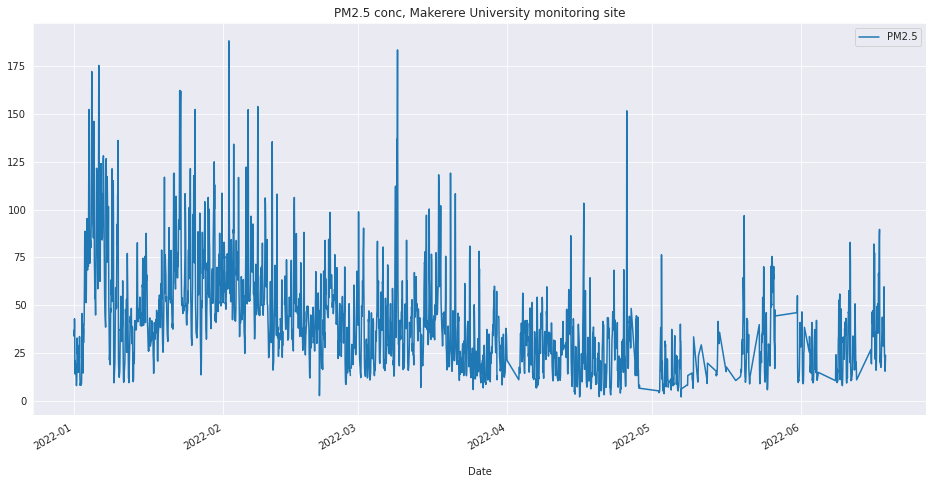

In [8]:
makerere_data.plot(kind='line', xlabel='\nDate', 
                   title='PM2.5 conc, Makerere University monitoring site')
plt.savefig('pandas_lineplot.png')

In [9]:
makerere_data['24H_moving_avg'] = makerere_data['PM2.5'].rolling('24H').mean()
makerere_data['7D_moving_avg'] = makerere_data['PM2.5'].rolling('7D').mean()

In [10]:
makerere_data

,PM2.5,24H_moving_avg,7D_moving_avg
datetime,,,
2022-01-01 01:00:00,36.84,36.840000,36.840000
2022-01-01 02:00:00,33.76,35.300000,35.300000
2022-01-01 03:00:00,36.27,35.623333,35.623333
2022-01-01 04:00:00,42.84,37.427500,37.427500
2022-01-01 05:00:00,38.95,37.732000,37.732000
...,...,...,...
2022-06-18 08:00:00,22.72,31.544583,34.718469
2022-06-18 09:00:00,15.79,31.230833,34.770102
2022-06-18 10:00:00,15.41,31.050000,34.812755


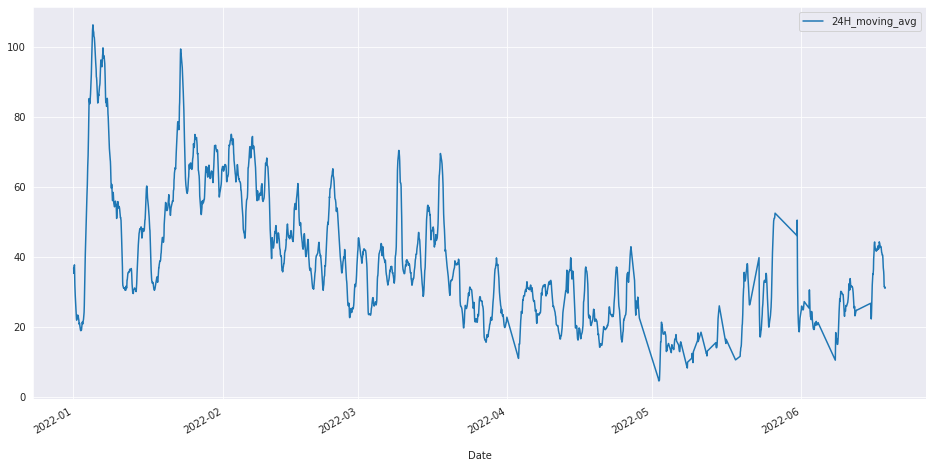

In [11]:
makerere_data.plot(kind='line', xlabel='\nDate', y='24H_moving_avg')
plt.savefig('24H_MA.png')

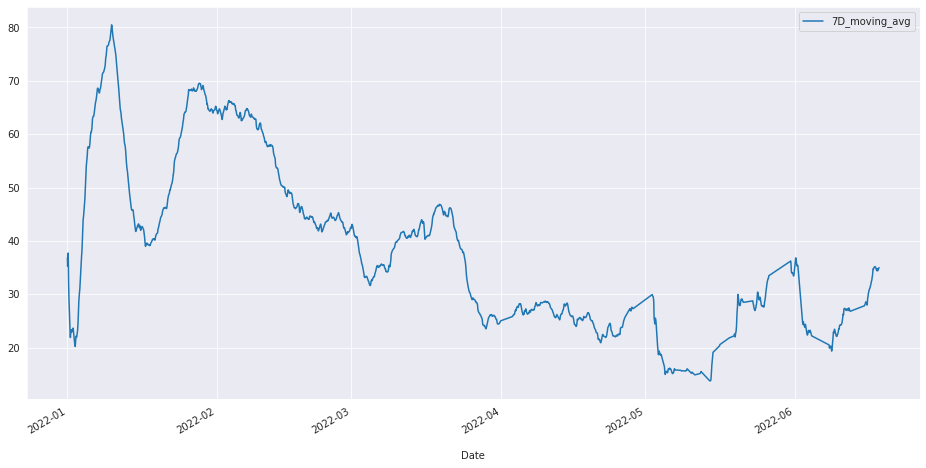

In [12]:
makerere_data.plot(kind='line', xlabel='\nDate', y='7D_moving_avg')
plt.savefig('7D_MA.png')

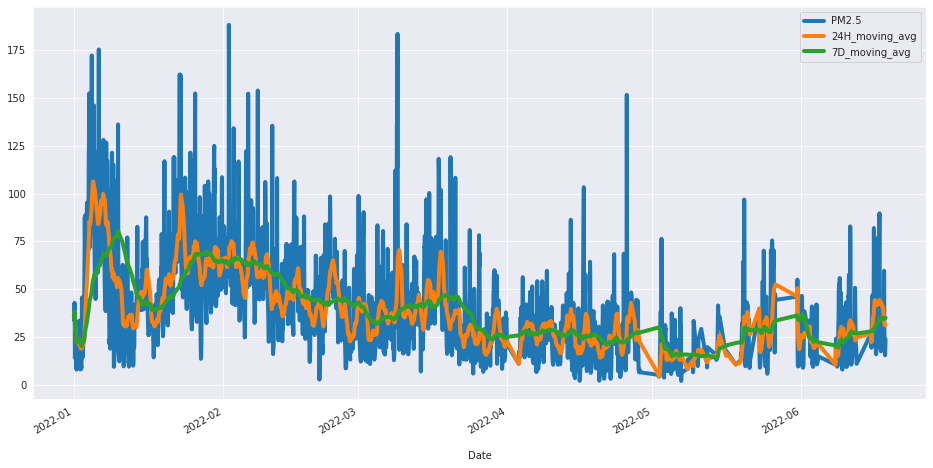

In [15]:
makerere_data.plot(kind='line', xlabel='\nDate', y=['PM2.5', '24H_moving_avg', '7D_moving_avg'], lw=4)
plt.savefig('all_MA.png')